<a href="https://colab.research.google.com/github/lakatosgabor/OpenCV_gyakorlat/blob/main/1_konzultacio_5_resz_Hough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. OpenCV importálás
A kódolás megkezdése előtt érdemes az Open CV verzióját lekérni.
Egyrészt meg kell vizsgálnunk, hogy létezik-e a futtatókörnyezetben, másrészt az egyes függvényhívások, és a függvények paraméterezései verziónként eltérő lehet.

Ha nem áll rendelkezésre, hozz létre egy kód blokkot a bal felső sarokban található " + Kód " gommbal, majd futtasd a követező parancsot:

```
!pip install opencv-python-headless
```


In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

# OpenCV verziójának lekérdezése
versionOfOpenCV = cv.__version__
print("OpenCV verzió: " + versionOfOpenCV)

OpenCV verzió: 4.8.0


#2. Drive csatlakoztatása

Futtasd az alábbi kódot a Google Drive tárhely csatlkoztatásához.
Add meg a Google által kért engedélyeket.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#3. Kép betöltése Google Drive-ból
A Drive-ba feltölött fájlokat a "/content/drive/MyDrive/" útvonal alatt érhetjük el. Az útvonal megtekinthető a bal oldali File Expoler-ben. Egy adott fájlt javasolt először kikeresni az Expolerben, majd jobb gombbal kattintva másoljuk ki a fájl elérési útvonalát. Ezáltal elkerülhetjük az elgépeléseket.

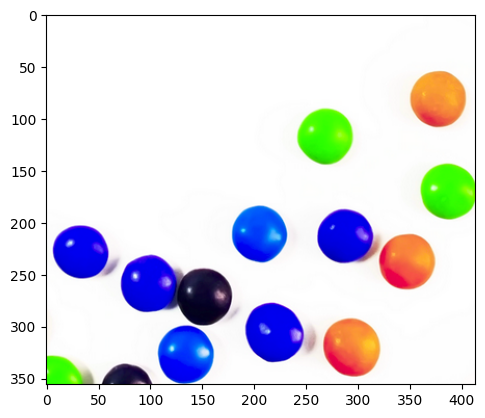

In [3]:
src = cv.imread("/content/drive/MyDrive/images/smarties.png")
plt.imshow(src)

#4. Kör detektációja, Hough transzformáció



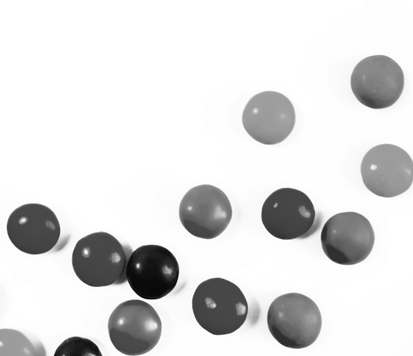

In [4]:
# Egy másolatot készítünk a bemeneti képről, amelyre rajzoljuk a köröket.
output = src.copy()

# A bemeneti képet szürkeárnyalatossá alakítjuk.
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

cv2_imshow(gray)

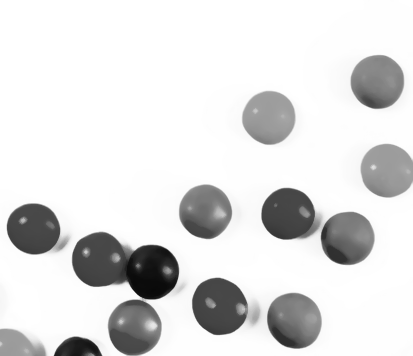

In [5]:
# Eltávolítjuk a zajt a képről egy medián elmosással.
gray = cv.medianBlur(gray, 5)

cv2_imshow(gray)

A detektált körök száma:  12


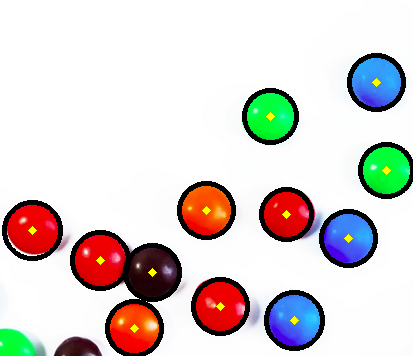

In [6]:
'''
img: A bemeneti kép, ahol köröket keresel.
cv.HOUGH_GRADIENT: A Hough transzformációs módszer típusa. Ebben az esetben a Hough kör transzformációt használja.
dp: A Hough transzformáció felbontását jelöli. Kisebb érték esetén pontosabb köröket talál, de növeli a számítási terhelést.
minDist: Két kör közötti minimális távolság a képen. Ha ez az érték kisebb, több kört fog találni, de lehet, hogy az azonos köröket többször is megtalálja.
param1: A Canny éldetektor első küszöbértékének beállítása.
param2: A Hough transzformáció második küszöbértéke. Ez az érték meghatározza, hogy egy pont mennyire legyen azonos egy körrel. Nagyobb érték esetén szigorúbb feltételekkel fogja elfogadni a köröket
minRadius: A kör minimális sugara. Körök kisebb mint ez az érték nem lesznek észlelve.
maxRadius: A kör maximális sugara. Körök nagyobb mint ez az érték nem lesznek észlelve.
'''
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, 49,
                          param1=70, param2=40, minRadius=0, maxRadius=0)

# Az észlelt körök paramétereit egész számokká alakítjuk és kerekítjük.
detected_circles = np.uint16(np.around(circles))

if len(detected_circles[0]) == 0:
  print("Nem találtam kör objektumot a képen!")

print("A detektált körök száma: ", len(detected_circles[0]))
# Végigmegyünk az észlelt körökön és kirajzoljuk őket a kimeneti képre.
for (x, y ,r) in detected_circles[0, :]:
    cv.circle(output, (x, y), r, (0, 0, 0), 3)  # Kör kerületének kirajzolása
    cv.circle(output, (x, y), 2, (0, 255, 255), 3)  # Középpont kirajzolása

# Az eredménykép megjelenítése a cv2_imshow() függvény segítségével.
cv2_imshow(output)

# Várunk, amíg egy billentyű lenyomására várunk, majd bezárjuk az összes ablakot.
cv.waitKey(0)
cv.destroyAllWindows()

# 5. Egyenes detektáció Hough transzformáció


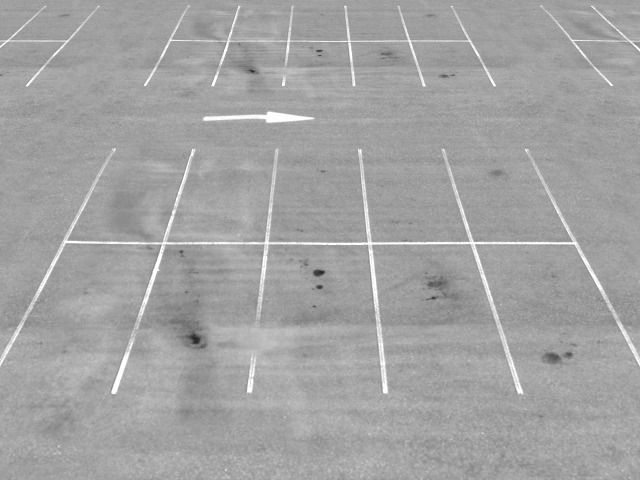

In [7]:
src = cv.imread("/content/drive/MyDrive/images/road.png")

# A beolvasott képet átalakítjuk szürkeárnyalatos képpé a "cvtColor" függvénnyel.
# A "COLOR_BGR2GRAY" átalakítási konstans azt jelzi, hogy a színképet szürkeárnyalatossá alakítjuk át.
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

# A "cv2_imshow" függvény segítségével megjelenítjük a szürkeárnyalatos képet.
cv2_imshow(gray)

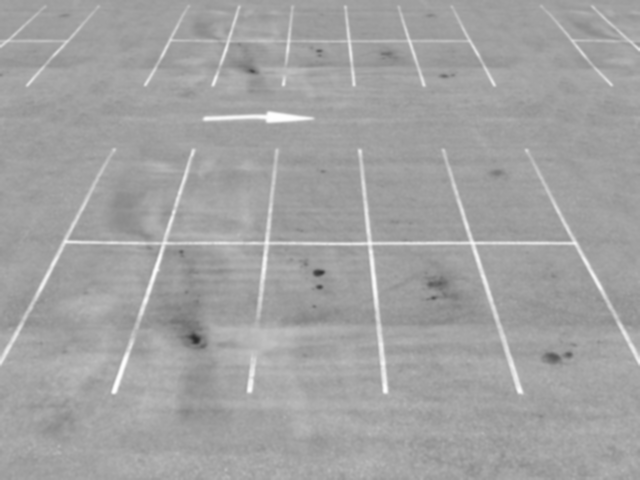

In [8]:
# A "kernel_size" változóba eltároljuk a kernel méretét, amelyet a GaussianBlur szűréshez használunk.
kernel_size = 5

# A "cv.GaussianBlur" függvényt használjuk a szürkeárnyalatos kép elmosására (szűrésére).
# A "gray" változót az előző szakaszból használjuk, ami a szürkeárnyalatos képet tartalmazza.
# A kernel méretét (szűrő méretét) a "kernel_size" változóból olvassuk be.
# A harmadik argumentum (0) azt jelenti, hogy a GaussianBlur függvény automatikusan kiszámolja a szűrő szórását.
blur_gray = cv.GaussianBlur(gray, (kernel_size, kernel_size), 0)

# A "cv2_imshow" függvény segítségével megjelenítjük az elmosott szürkeárnyalatos képet.
cv2_imshow(blur_gray)

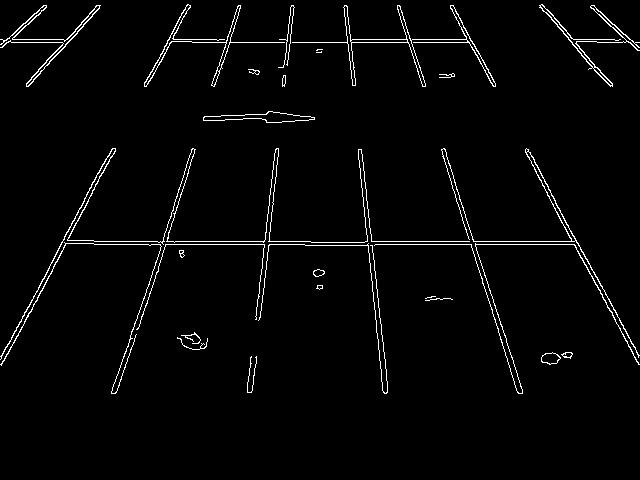

In [9]:
# A "low_threshold" és "high_threshold" változókban tároljuk az élek detektálásának küszöbértékeit.
low_threshold = 50
high_threshold = 150

# A "cv.Canny" függvényt használjuk az élek detektálására a "blur_gray" szürkeárnyalatos képen.
# A "blur_gray" változót az előző szakaszból használjuk, ami az elmosott szürkeárnyalatos képet tartalmazza.
# A "low_threshold" és "high_threshold" értékeket a küszöbértékek beállításához használjuk.
edges = cv.Canny(blur_gray, low_threshold, high_threshold)

cv2_imshow(edges)

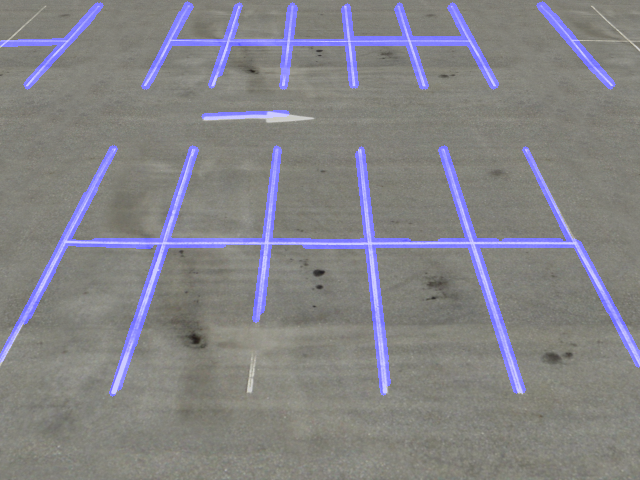

In [10]:
# Hough transzformációhoz kapcsolódó paraméterek beállítása
rho = 1  # Pixelekben mért távolsági felbontás a Hough rácsban
theta = np.pi / 180  # Szögi felbontás radiánban a Hough rácsban
threshold = 15  # Minimum szavazatok száma (metszéspontok a Hough rács cellájában)
min_line_length = 50  # A vonalat alkotó minimális pixel szám
max_line_gap = 20  # A vonalak összekapcsolására szolgáló maximális rés a pixelek között
line_image = np.copy(src) * 0  # Üres kép létrehozása a vonalak rajzolásához

# Hough transzformáció futtatása az él-detektált képen
# Az "lines" egy tömb, amely tartalmazza a detektált vonalszegmensek végpontjait
lines = cv.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

# A detektált vonalszegmenseken végigmegyünk és vonalakat rajzolunk rájuk a "line_image" képre
for line in lines:
    for x1, y1, x2, y2 in line:
        cv.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)

# Az eredeti képre a vonalakat rajzoljuk átlátszóan
lines_edges = cv.addWeighted(src, 0.8, line_image, 1, 0)

cv2_imshow(lines_edges)

# Érmék detektációja feladat


Érmék száma:  18 db


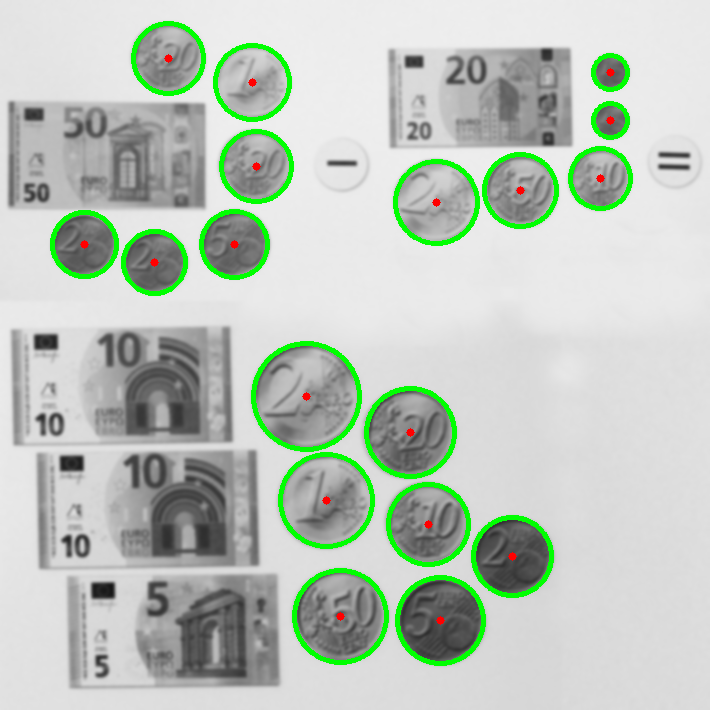

In [38]:
# Kép beolvasása szürkeárnyalatosban a megadott elérési útról, használd a coins2.jpg képet

# Gauss simítás alkalmazása a képre (szűrő mérete: 7x7, szórás: 1.5)

# Szürkeárnyalatos kép átkonvertálása BGR színformátumba

'''
cv.HoughCircles függvény alkalmazása
img: A bemeneti kép, ahol köröket keresel.
cv.HOUGH_GRADIENT: A Hough transzformációs módszer típusa. Ebben az esetben a Hough kör transzformációt használja.
dp: A Hough transzformáció felbontását jelöli. Kisebb érték esetén pontosabb köröket talál, de növeli a számítási terhelést.
minDist: Két kör közötti minimális távolság a képen. Ha ez az érték kisebb, több kört fog találni, de lehet, hogy az azonos köröket többször is megtalálja.
param1: A Canny éldetektor első küszöbértékének beállítása.
param2: A Hough transzformáció második küszöbértéke. Ez az érték meghatározza, hogy egy pont mennyire legyen azonos egy körrel. Nagyobb érték esetén szigorúbb feltételekkel fogja elfogadni a köröket
minRadius: A kör minimális sugara. Körök kisebb mint ez az érték nem lesznek észlelve.
maxRadius: A kör maximális sugara. Körök nagyobb mint ez az érték nem lesznek észlelve.
'''
circles =

# Körök adatainak egész számokká konvertálása


# Körök kirajzolása a képre és a középpontjuk megjelölése
 # Kör kirajzolása (zöld színű)
 # Kör középpontjának megjelölése (piros színű)


# Eredménykép megjelenítése

